In [1]:
# This code generates ORN response csv files, which are used as the input data to the olfactory network.
# This code uses DoOR dataset.

In [2]:
import csv
import pprint
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import seaborn as sns

In [3]:
OR_list={0:'Or67d',1:'Or83c',2:'Or23a',3:'Or19a',4:'Or2a',5:'Or43a',6:'Or47b',7:'Or65a',8:'Or88a',9:'Or42b',10:'Or92a',11:'Gr21a.Gr63a',12:'Or10a',13:'Or59b',14:'ab2B',15:'Or33b',16:'Or22a',17:'Or85b',18:'Or7a',19:'ab4B',20:'Or33a',21:'',22:'Or82a',23:'ab5B',24:'Or47a',25:'Or13a',26:'Or49b',27:'Or98a',28:'Or67c',29:'Or43b',30:'Or9a',31:'Or67b',32:'Or69a',33:'Or67a',34:'',35:'Or49a',36:'Or85f',37:'Ir31a',38:'Ir75d',39:'Ir92a',40:'Ir75a',41:'Ir41a',42:'ac3A',43:'ac3B',44:'Or35a',45:'Ir84a',46:'Ir76a',47:'',48:'',49:'Ir64a.DC4',50:'Ir64a.Dp1m',51:'Or42a',52:'Or71a',53:'pb2A',54:'Or33c',55:'Or85e',56:'Or46a',57:'Or59c',58:'Or85d'}
odorant_num=500
odorant_name=pd.DataFrame()
for i,name in OR_list.items():
    try:
        df0 = pd.read_csv('../resorces/DoOR/'+name+'.csv')
        df3=pd.concat([df0.iloc[:,0:1], df0.loc[:,"Name"]], axis=1)
        df3.columns=['id', 'Name']
        odorant_name=odorant_name.append(df3)
    except FileNotFoundError:
        print('File Open Error '+name)
odorant_name=odorant_name[~odorant_name.duplicated()]
print(odorant_name)
odorant_list=[]
for j in range(1, odorant_num):
    if odorant_name[odorant_name['id'].isin([j])].empty:
        odorant_list.append(j)
    else:
        odorant_list.append(odorant_name[odorant_name['id'].isin([j])].iat[0, 1])
print(odorant_list)


File Open Error Or67d
File Open Error 
File Open Error 
File Open Error 
File Open Error 
File Open Error pb2A
      id                   Name
0      1                    sfr
1      6                ammonia
2      7           ethanolamine
3     16         methanoic acid
4     17            acetic acid
..   ...                    ...
144  632              quercetin
145  633    butylhydroxytoluene
146  634  ethyl protocatechuate
147  635                tyrosol
148  636         phenoxyethanol

[635 rows x 2 columns]
['sfr', 'water', 'ammonium hydroxide', 'putrescine', 'cadaverine', 'ammonia', 'ethanolamine', 'heptylamine', 'isoamylamine', 'dimethylamine', 'gamma-butyrolactone', 'gamma-hexalactone', 'gamma-octalactone', 'gamma-decalactone', 'delta-decalactone', 'methanoic acid', 'acetic acid', 'propanoic acid', 'butyric acid', 'pentanoic acid', 'hexanoic acid', 'heptanoic acid', 'octanoic acid', 'nonanoic acid', 'linoleic acid', 'isobutyric acid', 'isopentanoic acid', 'pyruvic acid', '2-et

In [4]:
data=pd.DataFrame()
for i,name in OR_list.items():
    print(name)
    try:
        df0 = pd.read_csv('../resorces/DoOR/'+name+'.csv')
        df1=pd.concat([df0.iloc[:,0:1], df0.loc[:,"model.response"]], axis=1)
        df1.columns=['id', 'value']
        row=[]
        for i in range(1, odorant_num):
            if df1[df1['id'].isin([i])].empty:
                row.append(0)
            else:
                row.append(df1[df1['id'].isin([i])].iat[0, 1])
        df2=pd.DataFrame(row).T
        df2.columns=odorant_list
        data=data.append(df2)
    except FileNotFoundError:
        row=[]
        for i in range(1, odorant_num):
            row.append(0)
        df2=pd.DataFrame(row).T
        df2.columns=odorant_list
        data=data.append(df2)
        print('File Open Error '+name)       
data=data.T
data.columns=OR_list.values()
print(data)
data.to_csv('./ORNcsv.csv')

Or67d
File Open Error Or67d
Or83c
Or23a
Or19a
Or2a
Or43a
Or47b
Or65a
Or88a
Or42b
Or92a
Gr21a.Gr63a
Or10a
Or59b
ab2B
Or33b
Or22a
Or85b
Or7a
ab4B
Or33a

File Open Error 
Or82a
ab5B
Or47a
Or13a
Or49b
Or98a
Or67c
Or43b
Or9a
Or67b
Or69a
Or67a

File Open Error 
Or49a
Or85f
Ir31a
Ir75d
Ir92a
Ir75a
Ir41a
ac3A
ac3B
Or35a
Ir84a
Ir76a

File Open Error 

File Open Error 
Ir64a.DC4
Ir64a.Dp1m
Or42a
Or71a
pb2A
File Open Error pb2A
Or33c
Or85e
Or46a
Or59c
Or85d
                           Or67d  Or83c  Or23a  Or19a   Or2a  Or43a  Or47b  \
sfr                          0.0    0.0  0.000  0.000  0.000  0.000  0.000   
water                        0.0    0.0  0.000  0.000  0.000  0.000  0.000   
ammonium hydroxide           0.0    0.0 -0.004 -0.003  0.008 -0.005 -0.020   
putrescine                   0.0    0.0 -0.004 -0.019  0.015 -0.063 -0.065   
cadaverine                   0.0    0.0 -0.015 -0.014  0.003 -0.047 -0.040   
...                          ...    ...    ...    ...    ...    ...    ...   
(-)

In [5]:
glomeruli_OR={'DA1':'Or67d','DC3':'Or83c','DA3':'Or23a','DC1':'Or19a','DA4m':'Or2a','DA4L':'Or43a','VA1v':'Or47b','DL3':'Or65a','VA1d':'Or88a','DM1':'Or42b','VA2':'Or92a','V':'Gr21a.Gr63a','DL1':'Or10a','DM4':'Or59b','DM5':'ab2B','DM5':'Or33b','DM5':'Or59b','DM2':'Or22a','VM5d':'Or85b','DL5':'Or7a','DA2':'ab4B','DA2':'Or33a','VA6':'Or82a','DM3':'ab5B','DM3':'Or33b','DM3':'Or47a','DC2':'Or13a','VA5':'Or49b','VM5v':'Or98a','VC4':'Or67c','VM2':'Or43b','VM3':'Or9a','VA3':'Or67b','D':'Or69a','DM6':'Or67a','DL4':'Or49a','DL4':'Or85f','VL2p':'Ir31a','VL1':'Ir75d','VM1':'Ir92a','DP1l':'Ir75a','VC5':'Ir41a','DL2d':'ac3A','VC3':'ac3B','VC3':'Or35a','VL2a':'Ir84a','VM4':'Ir76a','DC4':'Ir64a.DC4','Dp1m':'Ir64a.Dp1m','VM7d':'Or42a','VC2':'Or71a','VC1':'pb2A','VC1':'Or33c','VC1':'Or85e','VA7L':'Or46a','VM7v':'Or59c','VA4':'Or85d'}
OR_glomeruli={'Or67d':'DA1','Or83c':'DC3','Or23a':'DA3','Or19a':'DC1','Or2a':'DA4m','Or43a':'DA4L','Or47b':'VA1v','Or65a':'DL3','Or88a':'VA1d','Or42b':'DM1','Or92a':'VA2','Gr21a.Gr63a':'V','Or10a':'DL1','Or59b':'DM4','ab2B':'DM5','Or33b':'DM5','Or59b':'DM5','Or22a':'DM2','Or85b':'VM5d','Or7a':'DL5','ab4B':'DA2','Or33a':'DA2','Or82a':'VA6','ab5B':'DM3','Or33b':'DM3','Or47a':'DM3','Or13a':'DC2','Or49b':'VA5','Or98a':'VM5v','Or67c':'VC4','Or43b':'VM2','Or9a':'VM3','Or67b':'VA3','Or69a':'D','Or67a':'DM6','Or49a':'DL4','Or85f':'DL4','Ir31a':'VL2p','Ir75d':'VL1','Ir92a':'VM1','Ir75a':'DP1l','Ir41a':'VC5','ac3A':'DL2d','ac3B':'VC3','Or35a':'VC3','Ir84a':'VL2a','Ir76a':'VM4','Ir64a.DC4':'DC4','Ir64a.Dp1m':'Dp1m','Or42a':'VM7d','Or71a':'VC2','pb2A':'VC1','Or33c':'VC1','Or85e':'VC1','Or46a':'VA7L','Or59c':'VM7v','Or85d':'VA4'}

ORN_type=pd.read_csv("../outputs/ORNtype/ORN_type.csv",header=None)
ORN_type=ORN_type[2].values.tolist()
ORN_type.pop(0)
ORN_type_OR=[]
for l in ORN_type:
    if l[4:] == 'DM5':
        r0=random.randint(0,2)
        if r0==0:
            ORN_type_OR.append('ab2B')
        elif r0==1:
            ORN_type_OR.append('Or33b')
        else:
            ORN_type_OR.append('Or59b')
    elif l[4:] == 'DA2':
        r0=random.randint(0,1)
        if r0==0:
            ORN_type_OR.append('ab4B')
        else:
            ORN_type_OR.append('Or33a')
    elif l[4:] == 'DM3':
        r0=random.randint(0,2)
        if r0==0:
            ORN_type_OR.append('ab5B')
        elif r0==1:
            ORN_type_OR.append('Or33b')
        else:
            ORN_type_OR.append('Or47a')
    elif l[4:] == 'DL4':
        r0=random.randint(0,1)
        if r0==0:
            ORN_type_OR.append('Or49a')
        else:
            ORN_type_OR.append('Or85f')
    elif l[4:] == 'VC3m':
        r0=random.randint(0,1)
        if r0==0:
            ORN_type_OR.append('ac3B')
        else:
            ORN_type_OR.append('Or35a')
    elif l[4:] == 'VC1':
        r0=random.randint(0,2)
        if r0==0:
            ORN_type_OR.append('pb2A')
        elif r0==1:
            ORN_type_OR.append('Or33c')
        else:
            ORN_type_OR.append('Or85e')
    elif l[4:] == 'DM4':
        ORN_type_OR.append('Or59b')
    elif l[4:] == 'DL2v':
        ORN_type_OR.append('ac3A')
    elif l[4:] == 'VC3l':
        ORN_type_OR.append('ac3B')
    elif l[4:] == 'VA7m':
        ORN_type_OR.append('null')
    else:
        f0=0
        for d in OR_glomeruli.items():
            if l[4:].lower()==d[1].lower():
                ORN_type_OR.append(d[0])
                f0=1
                break
        if f0==0:
            print(l)
print(len(ORN_type_OR))
print(ORN_type_OR)


1780
['Or67d', 'Or67d', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or10a', 'Ir64a.Dp1m', 'Or10a', 'Or49a', 'Or85f', 'Or67d', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or42b', 'Or59b', 'ac3A', 'ac3A', 'ac3A', 'Or10a', 'Or67d', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or7a', 'Or7a', 'Or49a', 'Or49a', 'Or33b', 'Or10a', 'Or10a', 'Or10a', 'Or7a', 'Or85f', 'Or49a', 'Or65a', 'Or85f', 'Or7a', 'Or85f', 'Or85f', 'Or65a', 'Or65a', 'Or65a', 'Or65a', 'Or85f', 'Or67d', 'Or85f', 'Or65a', 'Or67d', 'Or69a', 'Or33a', 'Or65a', 'Or65a', 'Or65a', 'Or67d', 'Or67d', 'Or67d', 'Or65a', 'Or67d', 'Or67d', 'Or65a', 'Or65a', 'Or65a', 'Or67d', 'Or69a', 'Or69a', 'Or67d', 'Ir75a', 'Ir31a', 'ac3A', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'Or10a', 'ac3A', 'Or10a', 'ac3A', 'ac3A', 'Or10a', '

(70, 60)


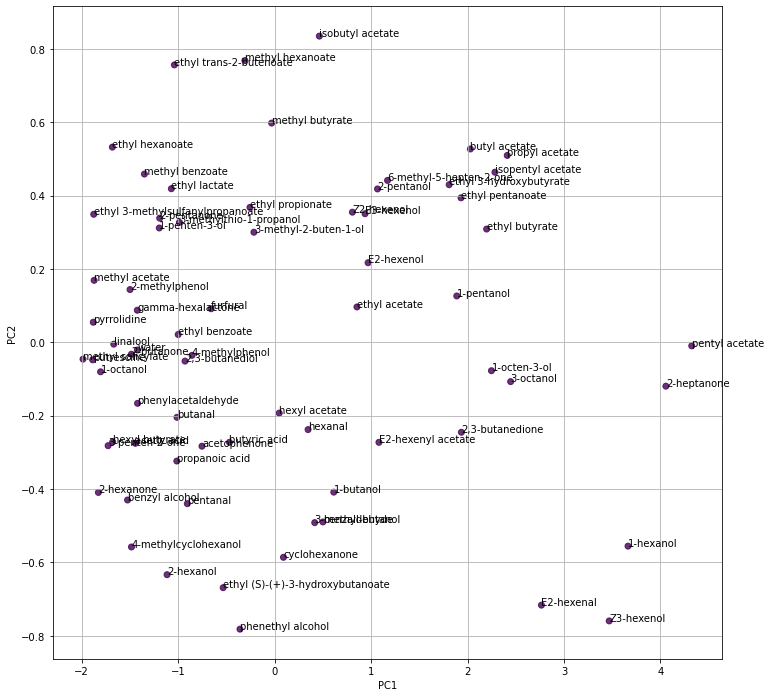

Index(['pentyl acetate', '2-heptanone', '1-hexanol', 'Z3-hexenol',
       'E2-hexenal', '3-octanol', 'propyl acetate', 'isopentyl acetate',
       'ethyl butyrate', '1-octen-3-ol', '2,3-butanedione', 'butyl acetate',
       'ethyl pentanoate', '1-pentanol', 'ethyl 3-hydroxybutyrate',
       '6-methyl-5-hepten-2-one', 'E2-hexenyl acetate', '2-pentanol',
       'ethyl acetate', 'E2-hexenol', 'E3-hexenol', 'Z2-hexenol', '1-butanol',
       'benzaldehyde', 'isobutyl acetate', '3-methyl-butanol', 'hexanal',
       'cyclohexanone', 'hexyl acetate', 'methyl butyrate', 'ethyl propionate',
       '3-methyl-2-buten-1-ol', 'phenethyl alcohol', 'butyric acid',
       'methyl hexanoate', 'ethyl (S)-(+)-3-hydroxybutanoate', 'furfural',
       'acetophenone', '4-methylphenol', '2,3-butanediol', 'propanoic acid',
       'pentanal', 'butanal', 'ethyl benzoate', '2-hexanol',
       '3-methylthio-1-propanol', 'ethyl lactate', 'ethyl trans-2-butenoate',
       '1-penten-3-ol', '2-pentanone', 'acetic acid'

In [6]:
from sklearn.decomposition import PCA
data['sum']=data.sum(axis=1)
data=data.sort_values(by=["sum"], ascending=False)
n0=70
def plot_pca_df(df,size):
    pca = PCA()
    pca.fit(df)
    feature = pca.transform(df)
    print(np.shape(feature))
    plt.figure(figsize=(size, size))
    plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
    for x, y, name in zip(feature[:, 0], feature[:, 1], df.index):
        plt.text(x, y, name)
    plt.grid()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
plot_pca_df(data[0:n0],12)
print(data[0:n0].index)

(6, 6)


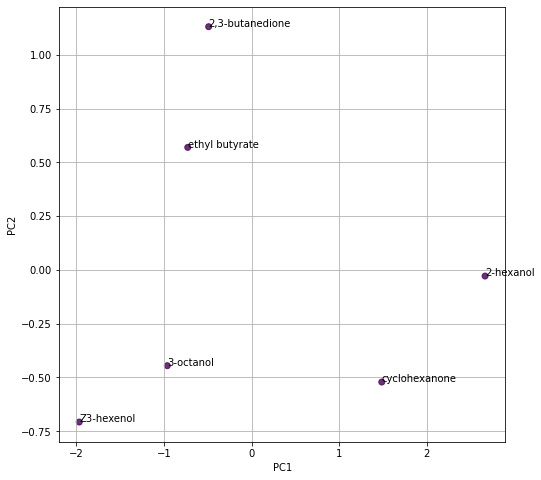

In [7]:
x0=192
l0=['3-octanol','Z3-hexenol',"cyclohexanone",'2,3-butanedione','2-hexanol','ethyl butyrate'] 
x1=[0.45,0.25,0.75,0.6,1,0.75]
DoOR_selected=data.loc[l0]
plot_pca_df(DoOR_selected,8)

In [8]:
P=6
odor_ORN_array=np.zeros((P,len(ORN_type_OR)))
print(np.shape(odor_ORN_array))
for i in range(P):
    for j in range(len(ORN_type_OR)):
        if ORN_type_OR[j]=="null":
            odor_ORN_array[i][j]=0
        else:
            odor_ORN_array[i][j]=DoOR_selected.T[l0[i]][ORN_type_OR[j]]
print(odor_ORN_array)


(6, 1780)
[[ 0.     0.     0.    ...  0.369  0.     0.   ]
 [ 0.     0.    -0.021 ...  0.     0.     0.   ]
 [ 0.     0.     0.    ... -0.001  0.     0.   ]
 [ 0.     0.     0.042 ...  0.    -0.04  -0.002]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.    -0.021 ...  0.063  0.     0.   ]]


In [9]:
%load_ext Cython

In [10]:
%%cython -a
from libc.stdlib cimport rand, RAND_MAX, srand
from libc.time cimport time

n0=1780
def cy_generate_ORN_array(array,int tmax,int P,float x0,list x1):
    srand(1)
    d0=[[]]
    for t in range(tmax*1000):
        if t%1000==0:
            print(t/1000)
        if int(t/1000)%5==0:
            j=int(int(t/1000)/5)%P
            for i in range(n0):
                r0=array[j][i]*x0*x1[j]
                if r0<0:
                    r0=0
                if (rand()+1.0)/(RAND_MAX+2.0)<(r0+8)*0.001:
                    l=[]
                    l.append(t*0.001)
                    l.append(i)
                    d0.append(l)
        else:
            for i in range(n0):
                if (rand()+1.0)/(RAND_MAX+2.0)<8*0.001:
                    l=[]
                    l.append(t*0.001)
                    l.append(i)
                    d0.append(l)
    return d0

In [11]:
%%cython -a
from libc.stdlib cimport rand, RAND_MAX, srand
from libc.time cimport time


n0=1780
def cy_generate_ORN_osci_array(array,int tmax,int P,float x0,list x1):
    srand(1)
    d0=[[]]
    t0=300
    for t in range(tmax*1000):
        if t%1000==0:
            print(t/1000)
        if t/1000<t0:
            if int(t/1000)%5==0:
                j=int(int(t/1000)/5)%P
                for i in range(n0):
                    r0=array[j][i]*x0*x1[j]
                    if r0<0:
                        r0=0
                    if rand()/RAND_MAX<(r0+8)*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)
            else:
                for i in range(n0):
                    if rand()/RAND_MAX<8*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)
        else:
            if int(t/1000)%20<10:
                j=int(int(t/1000-t0)/20)%P
                for i in range(n0):
                    r0=array[j][i]*x0*x1[j]
                    if r0<0:
                        r0=0
                    if rand()/RAND_MAX<(r0+8)*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)
            else:
                for i in range(n0):
                    if rand()/RAND_MAX<8*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)                                        
    return d0

In [12]:
%%cython -a
from libc.stdlib cimport rand, RAND_MAX, srand
from libc.time cimport time


n0=1780
def cy_generate_ORN_osci_1odor_array(array,int tmax,int P,float x0,list x1):
    srand(1)
    d0=[[]]
    t0=300
    for t in range(tmax*1000):
        if t%1000==0:
            print(t/1000)
        if t/1000<t0:
            if int(t/1000)%5==0:
                j=int(int(t/1000)/5)%P
                for i in range(n0):
                    r0=array[j][i]*x0*x1[j]
                    if r0<0:
                        r0=0
                    if rand()/RAND_MAX<(r0+8)*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)
            else:
                for i in range(n0):
                    if rand()/RAND_MAX<8*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)
        else:
            if int(t/1000)%20<10:
                j=0
                for i in range(n0):
                    r0=array[j][i]*x0*x1[j]
                    if r0<0:
                        r0=0
                    if rand()/RAND_MAX<(r0+8)*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)
            else:
                for i in range(n0):
                    if rand()/RAND_MAX<8*0.001:
                        l=[]
                        l.append(t*0.001)
                        l.append(i)
                        d0.append(l)                                        
    return d0

In [13]:
d0=cy_generate_ORN_array(odor_ORN_array,4000,P,x0,x1)
d0=pd.DataFrame(d0)
d0.drop(0, inplace=True)
print(d0)
d0.to_csv('../outputs/ORNcsv/ORN_4000s.csv',header=None,index=None)

d0=cy_generate_ORN_osci_array(odor_ORN_array,3000,P,x0,x1)
d0=pd.DataFrame(d0)
d0.drop(0, inplace=True)
print(d0)
d0.to_csv('../outputs/ORNcsv/ORN_3000s_osci.csv',header=None,index=None)

d0=cy_generate_ORN_osci_1odor_array(odor_ORN_array,3000,P,x0,x1)
d0=pd.DataFrame(d0)
d0.drop(0, inplace=True)
print(d0)
d0.to_csv('../outputs/ORNcsv/ORN_3000s_osci_1odor.csv',header=None,index=None)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0


1330.0
1331.0
1332.0
1333.0
1334.0
1335.0
1336.0
1337.0
1338.0
1339.0
1340.0
1341.0
1342.0
1343.0
1344.0
1345.0
1346.0
1347.0
1348.0
1349.0
1350.0
1351.0
1352.0
1353.0
1354.0
1355.0
1356.0
1357.0
1358.0
1359.0
1360.0
1361.0
1362.0
1363.0
1364.0
1365.0
1366.0
1367.0
1368.0
1369.0
1370.0
1371.0
1372.0
1373.0
1374.0
1375.0
1376.0
1377.0
1378.0
1379.0
1380.0
1381.0
1382.0
1383.0
1384.0
1385.0
1386.0
1387.0
1388.0
1389.0
1390.0
1391.0
1392.0
1393.0
1394.0
1395.0
1396.0
1397.0
1398.0
1399.0
1400.0
1401.0
1402.0
1403.0
1404.0
1405.0
1406.0
1407.0
1408.0
1409.0
1410.0
1411.0
1412.0
1413.0
1414.0
1415.0
1416.0
1417.0
1418.0
1419.0
1420.0
1421.0
1422.0
1423.0
1424.0
1425.0
1426.0
1427.0
1428.0
1429.0
1430.0
1431.0
1432.0
1433.0
1434.0
1435.0
1436.0
1437.0
1438.0
1439.0
1440.0
1441.0
1442.0
1443.0
1444.0
1445.0
1446.0
1447.0
1448.0
1449.0
1450.0
1451.0
1452.0
1453.0
1454.0
1455.0
1456.0
1457.0
1458.0
1459.0
1460.0
1461.0
1462.0
1463.0
1464.0
1465.0
1466.0
1467.0
1468.0
1469.0
1470.0
1471.0
1472.0

2501.0
2502.0
2503.0
2504.0
2505.0
2506.0
2507.0
2508.0
2509.0
2510.0
2511.0
2512.0
2513.0
2514.0
2515.0
2516.0
2517.0
2518.0
2519.0
2520.0
2521.0
2522.0
2523.0
2524.0
2525.0
2526.0
2527.0
2528.0
2529.0
2530.0
2531.0
2532.0
2533.0
2534.0
2535.0
2536.0
2537.0
2538.0
2539.0
2540.0
2541.0
2542.0
2543.0
2544.0
2545.0
2546.0
2547.0
2548.0
2549.0
2550.0
2551.0
2552.0
2553.0
2554.0
2555.0
2556.0
2557.0
2558.0
2559.0
2560.0
2561.0
2562.0
2563.0
2564.0
2565.0
2566.0
2567.0
2568.0
2569.0
2570.0
2571.0
2572.0
2573.0
2574.0
2575.0
2576.0
2577.0
2578.0
2579.0
2580.0
2581.0
2582.0
2583.0
2584.0
2585.0
2586.0
2587.0
2588.0
2589.0
2590.0
2591.0
2592.0
2593.0
2594.0
2595.0
2596.0
2597.0
2598.0
2599.0
2600.0
2601.0
2602.0
2603.0
2604.0
2605.0
2606.0
2607.0
2608.0
2609.0
2610.0
2611.0
2612.0
2613.0
2614.0
2615.0
2616.0
2617.0
2618.0
2619.0
2620.0
2621.0
2622.0
2623.0
2624.0
2625.0
2626.0
2627.0
2628.0
2629.0
2630.0
2631.0
2632.0
2633.0
2634.0
2635.0
2636.0
2637.0
2638.0
2639.0
2640.0
2641.0
2642.0
2643.0